<a href="https://colab.research.google.com/github/Chuck2Win/Tutoring_machine-learning/blob/master/Logistic_regression_3_regularization(from_scratch).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

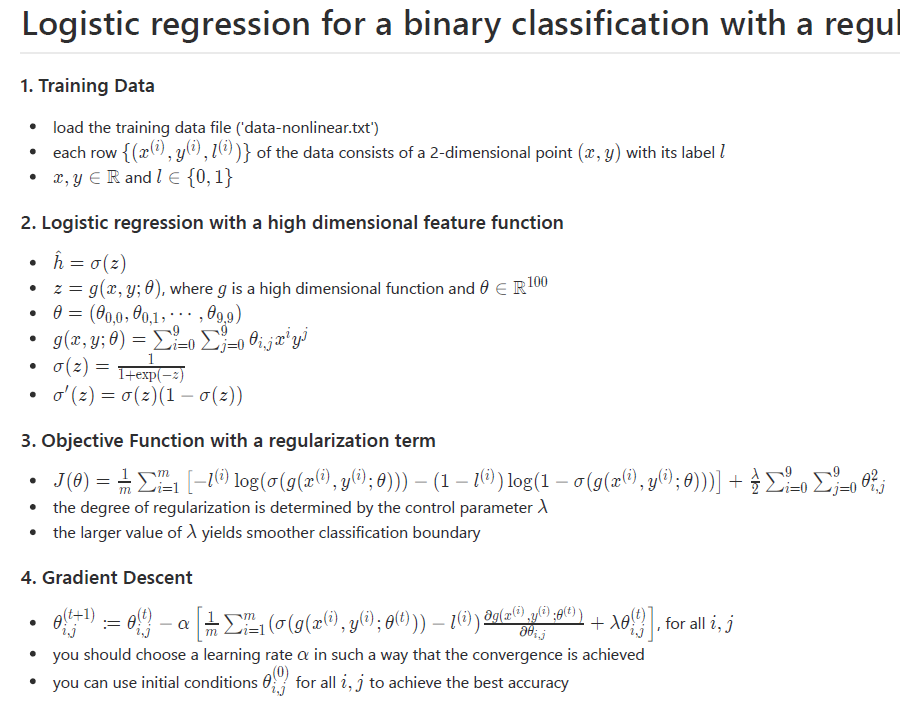

# 1. plott the training data

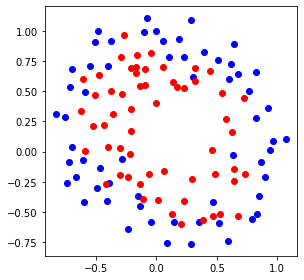

In [2]:
data=np.genfromtxt('https://raw.githubusercontent.com/Chuck2Win/Tutoring_machine-learning/master/data/data-nonlinear%20(3).txt',delimiter=',')
pointX = data[:, 0]
pointY = data[:, 1]
label = data[:, 2]
pointX0 = pointX[label == 0]
pointY0 = pointY[label == 0]
pointX1 = pointX[label == 1]
pointY1 = pointY[label == 1]
plt.figure()
plt.scatter(pointX0, pointY0, c='b')
plt.scatter(pointX1, pointY1, c='r')
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [3]:
def sigmoid(x):
    return 1./(1.+np.exp(-x))

def hypothesis(theta,input):
    return sigmoid(np.dot(input,theta))
    
def objective_function(theta,input,label,r):
    return (-label*np.log(hypothesis(theta,input))-(1-label)*np.log(1-hypothesis(theta,input))).mean()+0.5*r*(theta**2).mean()
    
def gradient_descent(theta,input,label,learning_rate,r):
    theta=theta-learning_rate*(((hypothesis(theta,input)-label).reshape(-1,1)*input).mean(axis=0)+r*theta)
    return theta

# 2. Plot the training error with varying regularization parameters

In [6]:
x_train=np.ones((data.shape[0],data.shape[1]))
x_train[:,1:]=data[:,:-1]
y_train=data[:,-1]

In [26]:
# 초기값 다 0으로
# learning rate 0.001
# epoch 만큼
# r=1
cost_1=[]
ACC_1=[]
epochs=50000
theta=np.array([0,0,0]) # theta0,theta1,theta2
Theta=[list(theta)] # theta는 np.array인데 list로 바꿔서 append
learning_rate=0.001
r=1
for epoch in range(epochs):
    cost_1.append(objective_function(theta,x_train,y_train,r))
    theta=gradient_descent(theta,x_train,y_train,learning_rate,r)
    Theta.append(list(theta)) 
    acc=((hypothesis(theta,x_train)>0.5)==y_train).mean() # 정확도
    ACC_1.append(acc)
Theta=np.array(Theta)   


# 초기값 다 0으로
# learning rate 0.001
# epoch 만큼
# r=100
cost_2=[]
ACC_2=[]
epochs=50000
theta=np.array([0,0,0]) # theta0,theta1,theta2
Theta=[list(theta)] # theta는 np.array인데 list로 바꿔서 append
learning_rate=0.001
r=100
for epoch in range(epochs):
    cost_2.append(objective_function(theta,x_train,y_train,r))
    theta=gradient_descent(theta,x_train,y_train,learning_rate,r)
    Theta.append(list(theta)) 
    acc=((hypothesis(theta,x_train)>0.5)==y_train).mean() # 정확도
    ACC_2.append(acc)
Theta=np.array(Theta)   

# 초기값 다 0으로
# learning rate 0.001
# epoch 만큼
# r=0.01
cost_3=[]
ACC_3=[]
epochs=50000
theta=np.array([0,0,0]) # theta0,theta1,theta2
Theta=[list(theta)] # theta는 np.array인데 list로 바꿔서 append
learning_rate=0.001
r=0.01
for epoch in range(epochs):
    cost_3.append(objective_function(theta,x_train,y_train,r))
    theta=gradient_descent(theta,x_train,y_train,learning_rate,r)
    Theta.append(list(theta)) 
    acc=((hypothesis(theta,x_train)>0.5)==y_train).mean() # 정확도
    ACC_3.append(acc)
Theta=np.array(Theta)   

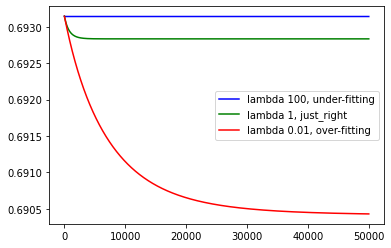

In [29]:
plt.plot(cost_2,label='lambda 100, under-fitting',c='b')
plt.plot(cost_1,label='lambda 1, just_right',c='g')
plt.plot(cost_3,label='lambda 0.01, over-fitting',c='r')
plt.legend(loc=0)
plt.show()

#3. Display the values of the chosen regularization parameters

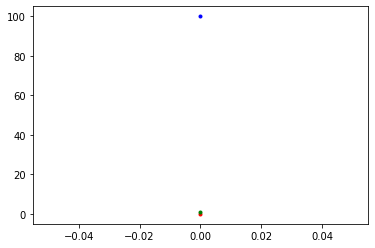

In [30]:
for i, j in zip([0.01,1,100],['r','g','b']):
    plt.plot([i],'.',c=j)
plt.show()

# 4. Plot the training accuracy with varying regularization parameters

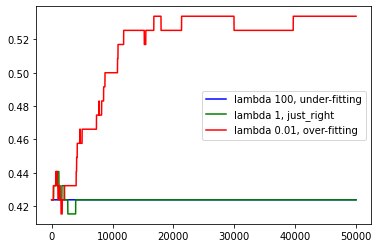

In [28]:
plt.plot(ACC_2,label='lambda 100, under-fitting',c='b')
plt.plot(ACC_1,label='lambda 1, just_right',c='g')
plt.plot(ACC_3,label='lambda 0.01, over-fitting',c='r')
plt.legend(loc=0)
plt.show()

# 5. Display the final training accuracy with varying regularization parameters


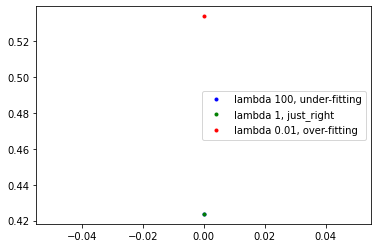

In [31]:
plt.plot(ACC_2[-1],'.',label='lambda 100, under-fitting',c='b')
plt.plot(ACC_1[-1],'.',label='lambda 1, just_right',c='g')
plt.plot(ACC_3[-1],'.',label='lambda 0.01, over-fitting',c='r')
plt.legend(loc='best')
plt.show()

# 6. Plot the optimal classfier with varying regularization parameters superimposed on the training data

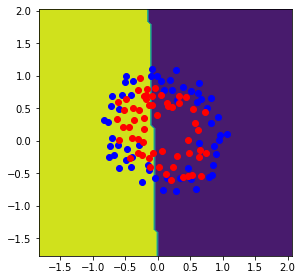

In [27]:
xx, yy = np.meshgrid(np.arange(pointX.min()-1, pointX.max()+1, 0.05), np.arange(pointY.min()-1, pointX.max()+1,0.05))
X = np.vstack( ( xx.reshape(1, np.product(xx.shape)), yy.reshape(1, np.product(yy.shape)) ) ).T # T는 전치
temp = np.ones((X.shape[0],X.shape[1]+1))
temp[:,1:] = X
# Predict the function value for the whole grid
pred = (hypothesis(theta,temp)>0.5)
Z = pred.reshape(xx.shape)
# Plot the contour and training examples <- 앞 선 문제라고 생각하면 됨.

plt.figure()
plt.contourf(xx, yy, Z)
plt.scatter(pointX0, pointY0, c='b')
plt.scatter(pointX1, pointY1, c='r')
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [69]:
# optimal classifier <- 이해 못하셔도 됩니다. 파이토치 써서 optimal function 구함 <- neural net
import torch
import torch.nn as nn
import torch.nn.functional as F
class model(nn.Module):
    def __init__(self):
        super(model,self).__init__()
        self.fc=nn.Sequential(nn.Linear(2,50),nn.Sigmoid(),nn.Linear(50,1),nn.Sigmoid())
    def forward(self,input):
        # input shape : m,2
        # must transpose
        output=self.fc(input)
        return output
optimal=model()
optmizer=torch.optim.Adam(optimal.parameters())
cost=[]
ACC=[]
for epoch in range(10000):
    optmizer.zero_grad()
    x=torch.FloatTensor(data[:,:-1])
    y=torch.FloatTensor(data[:,-1])
    output=optimal.forward(x)
    loss=F.binary_cross_entropy(output.squeeze(),y)
    loss.backward()
    
    optmizer.step()
    cost.append(loss.item())
    acc=((output.squeeze()>0.5).float() == y).float().mean()
    ACC.append(acc)


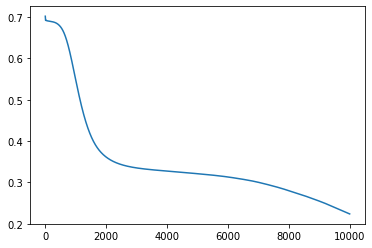

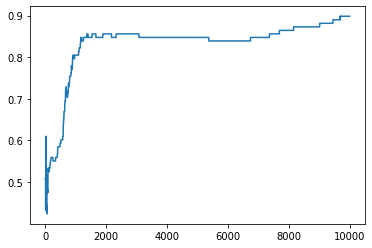

In [70]:
plt.plot(cost)
plt.show()
plt.plot(ACC)
plt.show()

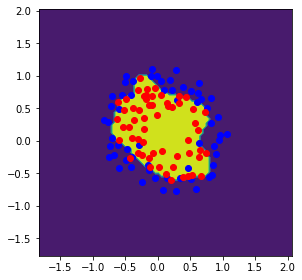

In [87]:
xx, yy = np.meshgrid(np.arange(pointX.min()-1, pointX.max()+1, 0.05), np.arange(pointY.min()-1, pointX.max()+1,0.05))
X = np.vstack( ( xx.reshape(1, np.product(xx.shape)), yy.reshape(1, np.product(yy.shape)) ) ).T # T는 전치
temp = X
# Predict the function value for the whole grid
pred = (optimal(torch.FloatTensor(temp)).squeeze().detach().numpy()>0.5)
Z = pred.reshape(xx.shape)
# Plot the contour and training examples <- 앞 선 문제라고 생각하면 됨.

plt.figure()
plt.contourf(xx, yy, Z)
plt.scatter(pointX0, pointY0, c='b')
plt.scatter(pointX1, pointY1, c='r')
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()